In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torch torchvision --upgrade
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201


image 1/1 /content/drive/MyDrive/Maching_learning/Cassava_diseases_detection.v2i.yolov5pytorch/les-maladies-de-l-usine-et-la-racine-manioc-124307114.jpg: 448x640 1 cbb, 259.3ms
Speed: 4.7ms preprocess, 259.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/Maching_learning/Cassava_diseases_detection.v2i.yolov5pytorch/les-maladies-de-l-usine-et-la-racine-manioc-124307114.jpg: 448x640 1 cbb, 323.6ms
Speed: 4.4ms preprocess, 323.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/Maching_learning/Cassava_diseases_detection.v2i.yolov5pytorch/les-maladies-de-l-usine-et-la-racine-manioc-124307114.jpg: 448x640 1 cbb, 249.2ms
Speed: 4.5ms preprocess, 249.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/drive/MyDrive/Maching_learning/Cassava_diseases_detection.v2i.yolov5pytorch/les-maladies-de-l-usine-et-la-racine-manioc-124307114.jpg: 448x640 1 cbb, 22

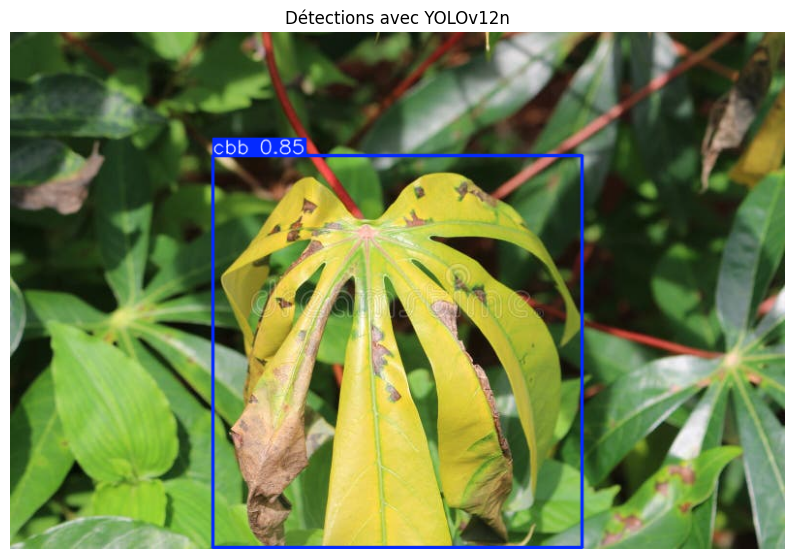

In [11]:
from ultralytics import YOLO
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Chemins vers les poids des modèles entraînés
models = {
    'YOLOv8n': '/content/drive/MyDrive/Maching_learning/Yolov8/runs/results/yolov8n_train2/weights/best.pt',
    'YOLOv9t': '/content/drive/MyDrive/Maching_learning/Yolov9/runs/results/yolov9t_train/weights/best.pt',
    'YOLOv10n': '/content/drive/MyDrive/Maching_learning/Yolov10/runs/results/yolov10n_train/weights/best.pt',
    'YOLOv11n': '/content/drive/MyDrive/Maching_learning/Yolov11/runs/results/yolo11n_train/weights/best.pt',
    'YOLOv12n': '/content/drive/MyDrive/Maching_learning/Yolov12/runs/results/yolo12n_train2/weights/best.pt'
}

# Classes du dataset
class_names = {0: 'cbb', 1: 'cbsd', 2: 'cgm', 3: 'cmd', 4: 'healthy'}

# Fonction pour charger et analyser l'image avec un modèle
def analyze_image(image_path, model_name, model_path):
    # Charger le modèle
    model = YOLO(model_path)

    # Charger l'image
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Impossible de charger l'image à partir de {image_path}")

    # Faire les prédictions
    results = model.predict(source=image_path, imgsz=640, conf=0.5, iou=0.7)

    # Extraire les métriques et les détections
    stats = {
        'model': model_name,
        'detections': [],
        'counts_per_class': {name: 0 for name in class_names.values()},
        'confidences': []
    }

    for result in results:
        boxes = result.boxes
        for box in boxes:
            cls_id = int(box.cls)
            conf = float(box.conf)
            class_name = class_names[cls_id]
            stats['detections'].append({
                'class': class_name,
                'confidence': conf,
                'bbox': box.xyxy.cpu().numpy().tolist()
            })
            stats['counts_per_class'][class_name] += 1
            stats['confidences'].append(conf)

    # Calculer la confiance moyenne
    stats['avg_confidence'] = np.mean(stats['confidences']) if stats['confidences'] else 0.0

    # Visualiser l'image avec les détections
    annotated_img = results[0].plot()

    return stats, annotated_img

# Chemin de l'image à analyser
image_path = '/content/drive/MyDrive/Maching_learning/Cassava_diseases_detection.v2i.yolov5pytorch/les-maladies-de-l-usine-et-la-racine-manioc-124307114.jpg'

# Analyser l'image avec chaque modèle
all_stats = {}
visualizations = {}

for model_name, model_path in models.items():
    try:
        stats, annotated_img = analyze_image(image_path, model_name, model_path)
        all_stats[model_name] = stats
        visualizations[model_name] = annotated_img
    except Exception as e:
        print(f"Erreur avec {model_name}: {str(e)}")

# Afficher les résultats
for model_name, stats in all_stats.items():
    print(f"\n=== Résultats pour {model_name} ===")
    print(f"Nombre total de détections: {len(stats['detections'])}")
    print("Détail des détections par classe:")
    for class_name, count in stats['counts_per_class'].items():
        print(f"  {class_name}: {count}")
    print(f"Confiance moyenne: {stats['avg_confidence']:.3f}")
    print("Boîtes englobantes (bbox):")
    for det in stats['detections']:
        print(f"  Classe: {det['class']}, Confiance: {det['confidence']:.3f}, Bbox: {det['bbox']}")

# Visualiser les résultats pour YOLOv8n (exemple)
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(visualizations['YOLOv12n'], cv2.COLOR_BGR2RGB))
plt.title('Détections avec YOLOv12n')
plt.axis('off')
plt.show()

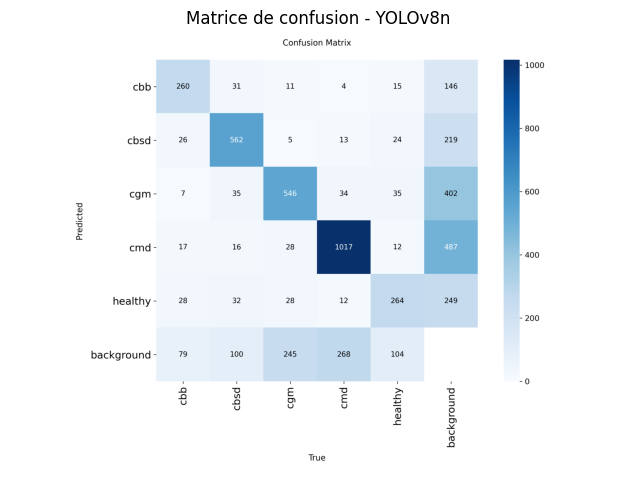

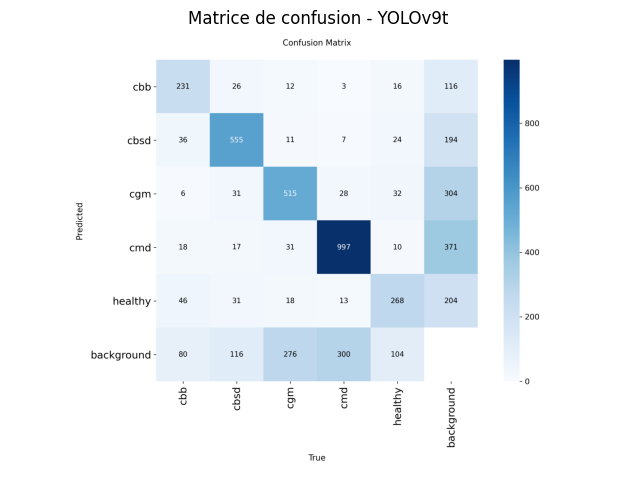

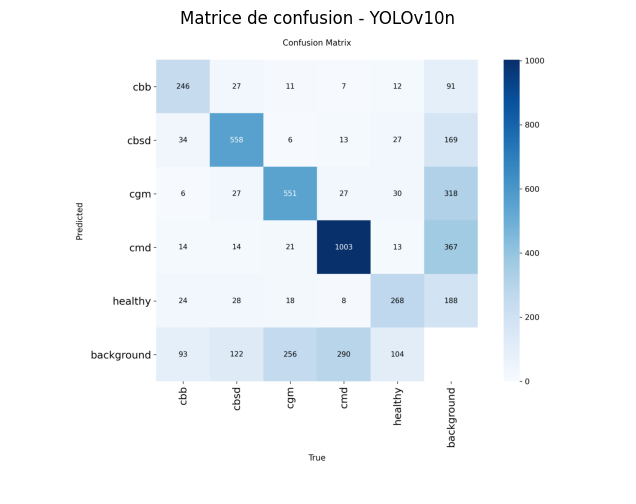

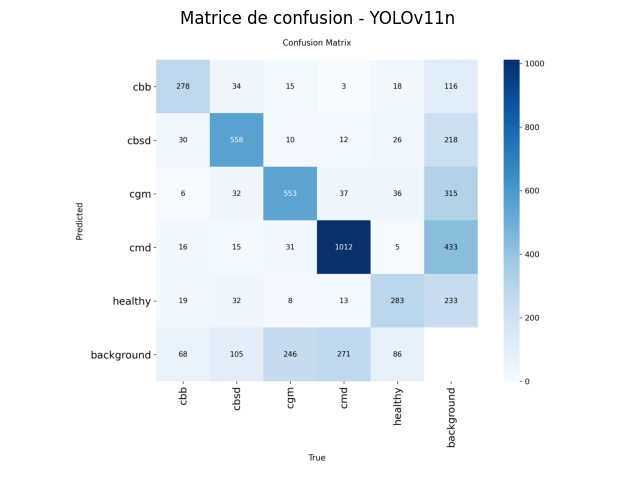

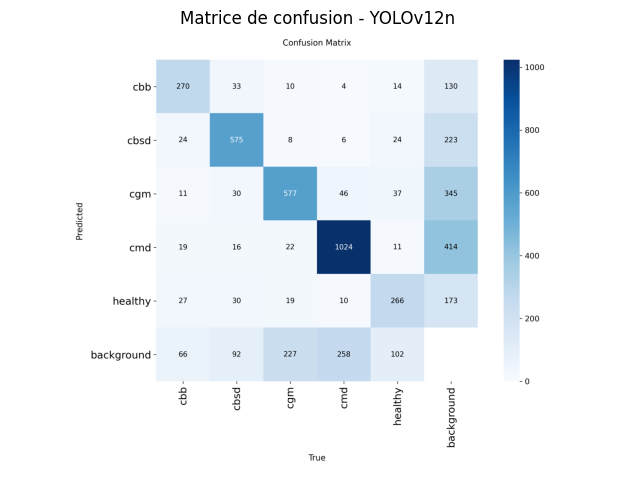

In [12]:
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Chemins vers les répertoires de résultats
runs_dirs = {
    'YOLOv8n': '/content/drive/MyDrive/Maching_learning/Yolov8/runs/results/yolov8n_train2',
    'YOLOv9t': '/content/drive/MyDrive/Maching_learning/Yolov9/runs/results/yolov9t_train',
    'YOLOv10n': '/content/drive/MyDrive/Maching_learning/Yolov10/runs/results/yolov10n_train',
    'YOLOv11n': '/content/drive/MyDrive/Maching_learning/Yolov11/runs/results/yolo11n_train',
    'YOLOv12n': '/content/drive/MyDrive/Maching_learning/Yolov12/runs/results/yolo12n_train2'
}

# Afficher les matrices de confusion pour chaque modèle
for model_name, run_dir in runs_dirs.items():
    confusion_matrix_path = Path(run_dir) / 'confusion_matrix.png'
    if confusion_matrix_path.exists():
        conf_matrix_img = plt.imread(confusion_matrix_path)
        plt.figure(figsize=(8, 6))
        plt.imshow(conf_matrix_img)
        plt.title(f'Matrice de confusion - {model_name}')
        plt.axis('off')
        plt.show()
    else:
        print(f"Matrice de confusion pour {model_name} non trouvée (vérifie si plots=True était activé).")


In [ ]:
!ls -l /content/runs

total 4
drwxr-xr-x 3 root root 4096 Jul 12 18:54 detect


In [ ]:
!mkdir -p /content/drive/MyDrive/Maching_learning/Yolo8

In [ ]:
!cp -r /content/runs /content/drive/MyDrive/Maching_learning/Yolo8/

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!ls -l /content/drive/MyDrive/Maching_learning/Yolo8/runs

total 4
drwx------ 3 root root 4096 Jul 13 08:23 detect


In [ ]:
!scp -r /content/runs '/content/drive/MyDrive/Maching_learning/Yolov8'